# **OCR using Convolutional Neural Networks.**
 **On [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.**

**Installing required libraries. In our case TensorFlow.**

In [1]:
!pip install tensorflow

### **Knowing the shape and exploring the dataset.**
**Importing [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, from TensorFlow Keras.**



In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('Shape of the dataset.')
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Shape of the dataset.
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
train_labels_count = np.unique(y_train, return_counts=True)
test_labels_count = np.unique(y_test, return_counts=True)
dataframe_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count Train':train_labels_count[1],'Count Test':test_labels_count[1]})
print(dataframe_labels.to_string(index=False))

 Label  Count Train  Count Test
     0         5923         980
     1         6742        1135
     2         5958        1032
     3         6131        1010
     4         5842         982
     5         5421         892
     6         5918         958
     7         6265        1028
     8         5851         974
     9         5949        1009


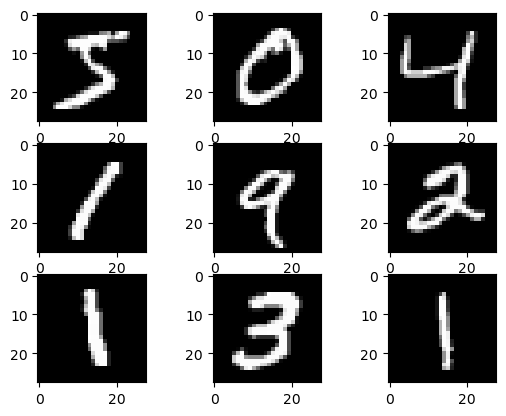

In [3]:
# 9 sample images of the dataset
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))

Train dataset ranges from  0  to  255 .
Train dataset mean value: 33.318
Test dataset ranges from  0  to  255 .
Test dataset mean value:  33.791


### **Reshaping and Normalizing the dataset**

Reshaping the array to 4-dims so that it can work with the Keras API.

Rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.

In [6]:
# Reshaping
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize
X_train /= 255.0
X_test /= 255.0
print('Train dataset ranges from ', X_train.min(),' to ', X_train.max(),'.')
print('Train dataset mean value:', round(X_train.mean(),3))
print('Test dataset ranges from ', X_test.min(),' to ', X_test.max(),'.')
print('Test dataset mean value: ', round(X_test.mean(),3))


Train dataset ranges from  0.0  to  1.0 .
Train dataset mean value: 0.131
Test dataset ranges from  0.0  to  1.0 .
Test dataset mean value:  0.133


### **Keras imports for building our convolutional neural network (CNN) model.**


In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [9]:
y = [1, 2, 3, 1, 2, 3, 1, 2, 3]  # example target variable
y_binary = to_categorical(y)

In [10]:
y = [1, 2, 3, 1, 2, 3, 1, 2, 3]  # example target variable
y_binary = to_categorical(y)

In [11]:
y_binary = to_categorical(y)

In [12]:
from keras.utils import to_categorical

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# one-hot encoding using numpy-related utilities of tensorflow's keras
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# Compiling the sequential model
# A loss function is one of the two mandatory arguments required for compiling a Keras model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.8915 - loss: 0.3781 - val_accuracy: 0.9771 - val_loss: 0.0724
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9829 - loss: 0.0585 - val_accuracy: 0.9805 - val_loss: 0.0568
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.9904 - loss: 0.0316 - val_accuracy: 0.9823 - val_loss: 0.0507
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9945 - loss: 0.0195 - val_accuracy: 0.9836 - val_loss: 0.0536
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9972 - loss: 0.0109 - val_accuracy: 0.9851 - val_loss: 0.0482


**Observations:**


*   The CNN model is able to get 98%+ accuracy with just a single convolution layer.
*   We can also add more Conv2D layers, and also play around with the hyperparameters of the CNN model to increase the accuracy further more.


### **Making individual predictions.**

No. of values in test dataset:  10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


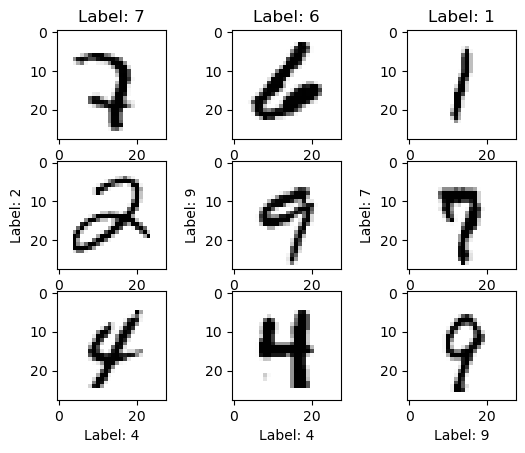

In [14]:
import random as r
print('No. of values in test dataset: ',X_test.shape[0])
for i in range (9):
  image_index=r.randint(0,10000)
  plt.subplot(331 + i)
  plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
  if i<3:  
    plt.title('Label: ' + str(pred.argmax()))
  elif i>=3 and i<6:
    plt.ylabel('Label: ' + str(pred.argmax()))
  else:
    plt.xlabel('Label: ' + str(pred.argmax()))
plt.show()

This is the individual character prediction from train dataset.

### **Evaluating Kearas model.**

In [17]:
import time
expected_label=Y_test[2345].argmax()
digit_image = X_test[2345].reshape(1, 28, 28, 1)
# repeat few times to take the average execution time
loop_count = 10

start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')
#saving keras model
model.save('./mnist-model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Keras inferences with 0.2584791421890259 second in average
[[6.7514456e-08 7.2949562e-09 1.1795349e-06 3.0690149e-05 3.5895442e-05
  8.1720224e-05 1.7811011e-11 2.0782942e-04 1.3755636e-03 9.9826705e-01]]
Predicted value: 9
Correct prediction !


### **Conversion from Keras to ONNX.**
Importing ONNX packages from source.

In [17]:
!pip install --quiet -U onnxruntime
!pip install --quiet -U git+https://github.com/microsoft/onnxconverter-common
!pip install --quiet -U git+https://github.com/onnx/keras-onnx

  error: subprocess-exited-with-error
  
  git clone --filter=blob:none --quiet https://github.com/microsoft/onnxconverter-common 'C:\Users\hp\AppData\Local\Temp\pip-req-build-bqo2wm71' did not run successfully.
  exit code: 128
  
  [1 lines of output]
  fatal: unable to access 'https://github.com/microsoft/onnxconverter-common/': Could not resolve host: github.com
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

git clone --filter=blob:none --quiet https://github.com/microsoft/onnxconverter-common 'C:\Users\hp\AppData\Local\Temp\pip-req-build-bqo2wm71' did not run successfully.
exit code: 128

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  error: subprocess-exited-with-error
  
  git clone --filter=blob:none --quiet https://github.com/onnx/keras-onnx 'C:\Users\hp\AppData\Local\Temp\pip-req-build-p0bipkua' did not run successful

In [50]:
import keras2onnx
print("keras2onnx version is "+keras2onnx.__version__)
# convert to onnx model
onnx_model = keras2onnx.convert_keras(model, 'mnist-onnx', debug_mode=1)
output_model_path = "./mnist-model.onnx"
# and save the model in ONNX format
keras2onnx.save_model(onnx_model, output_model_path)

AttributeError: module 'tensorflow.python.keras' has no attribute 'applications'

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9976 - loss: 0.0088 - val_accuracy: 0.9846 - val_loss: 0.0535
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 0.9820 - val_loss: 0.0678
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9986 - loss: 0.0054 - val_accuracy: 0.9801 - val_loss: 0.0720
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.9980 - loss: 0.0068 - val_accuracy: 0.9830 - val_loss: 0.0657
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9837 - val_loss: 0.0675


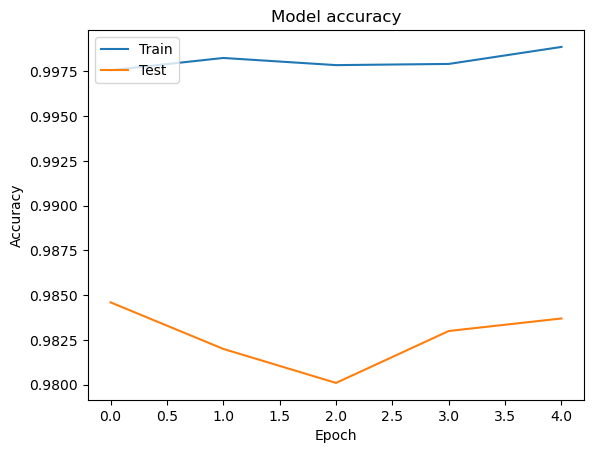

In [18]:
# Training the model and plotting accuracy

history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [19]:
history.hist(figsize=(15, 10), bins=50)
plt.show()

AttributeError: 'History' object has no attribute 'hist'

### **Evaluating ONNX model perfomance.**
Inference

In [56]:
import onnxruntime

In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
import onnxruntime  # <--- Add this line

# ... rest of the code ...

In [ ]:
import onnxruntime

sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession(output_model_path, sess_options)
data = [digit_image.astype(np.float32)]
input_names = sess.get_inputs()
feed = dict([(input.name, data[n]) for n, input in enumerate(sess.get_inputs())])

In [ ]:
start_time = time.time()
for i in range(loop_count):
    onnx_predicted_label = sess.run(None, feed)[0].argmax()
print("ONNX inferences with %s second in average" %((time.time() - start_time) / loop_count))

print('ONNX predicted value:', onnx_predicted_label)
if (expected_label == onnx_predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

if (predicted_label == onnx_predicted_label):
  print("The ONNX's and keras' prediction are matching !")
else:
  print("The ONNX's and keras' prediction does not match !")

*References:*

---


* [Medium.com/CNN](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)
* [TowardsDataScience.com/CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) 
* [Machine Learning & Deep Learning Fundamentals.](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)